# Disease Cell Classification usingTransfer Learning


# Malaria Cell Detection

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 46s 4s/step - loss: 1.0917 - accuracy: 0.5240 - val_loss: 0.6646 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 50s 4s/step - loss: 0.6354 - accuracy: 0.5529 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 3/50
13/13 [==============================] - 44s 3s/step - loss: 0.5469 - accuracy: 0.7332 - val_loss: 0.8318 - val_accuracy: 0.3881
Epoch 4/50
13/13 [==============================] - 38s 3s/step - loss: 0.4627 - accuracy: 0.7692 - val_loss: 0.9477 - val_accuracy: 0.3657
Epoch 5/50
13/13 [==============================] - 38s 3s/step - loss: 0.4244 - accuracy: 0.7957 - val_loss: 0.7581 - val_accuracy: 0.5075
Epoch 6/50
13/13 [==============================] - 39s 3s/step - loss: 0.3939 - accuracy: 0.8197 - val_loss: 1.1484 - val_accuracy: 0.4328
Epoch 7/50
13/13 [==============================] - 37s 3s/step - loss: 0.3647 - accuracy: 0.8438 - val_loss: 0.7012 - val_accuracy: 0.5821
Epoch 8/50
13/13 [==

In [21]:
#!pip install Pillow==7.1.2

  Using cached Pillow-7.1.2-cp36-cp36m-win_amd64.whl (2.0 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.1.2
    Uninstalling Pillow-8.1.2:
      Successfully uninstalled Pillow-8.1.2


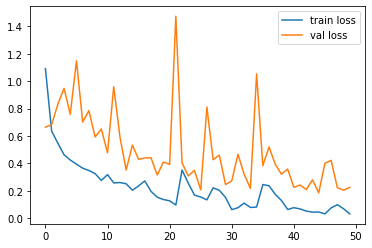

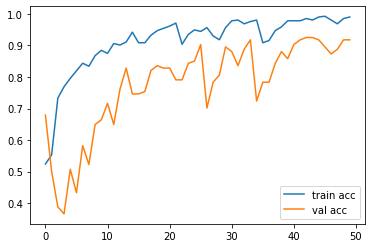

<Figure size 432x288 with 0 Axes>

In [45]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg_50.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[1.0000000e+00, 3.4012237e-17],
       [1.0000000e+00, 1.1563288e-19],
       [9.9999714e-01, 2.8724164e-06],
       [2.8171399e-01, 7.1828598e-01],
       [1.0000000e+00, 3.9806549e-16],
       [1.0000000e+00, 1.7515119e-09],
       [1.0338003e-02, 9.8966205e-01],
       [6.4665377e-03, 9.9353349e-01],
       [1.0000000e+00, 1.9220795e-12],
       [1.0000000e+00, 9.3186223e-09],
       [1.0000000e+00, 4.5382822e-11],
       [9.9998891e-01, 1.1139601e-05],
       [9.9994516e-01, 5.4837110e-05],
       [1.0000000e+00, 5.4480752e-16],
       [6.5795839e-02, 9.3420416e-01],
       [7.6186657e-04, 9.9923813e-01],
       [8.5069780e-04, 9.9914932e-01],
       [1.0000000e+00, 2.0790191e-21],
       [9.6690585e-04, 9.9903309e-01],
       [1.0000000e+00, 2.7877796e-08],
       [1.0000000e+00, 5.6905832e-20],
       [1.1973300e-02, 9.8802674e-01],
       [1.0000000e+00, 1.1153264e-13],
       [1.0000000e+00, 8.8834158e-09],
       [4.3313365e-04, 9.9956685e-01],
       [1.7470539e-02, 9.

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_vgg_50.h5')

In [35]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [36]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
